In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score,roc_auc_score

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- **pada kolom _Exited_ angka 0 : nasabah yg tdk menutup akun banknya, sedangkan angka 1 : nasabah yang menutup akun banknya**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**dataset tidak memiliki missing value, jadi bisa langsung dilakukan EDA 8tanpa harus melakukan handling missning value**

## EDA

In [5]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [6]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

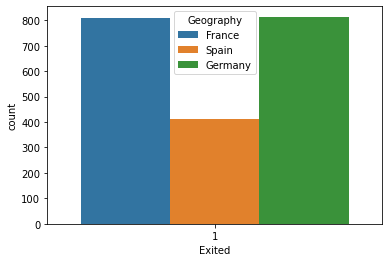

In [7]:
close_account = df[df['Exited'] == 1]
sns.countplot(data = close_account,x='Exited',hue='Geography')

**dari countplot diatas dapat ditarik kesimpulan bahwa negara yang paling banyak menutup akun banknya adalah negara _France_ dan _Germany_**

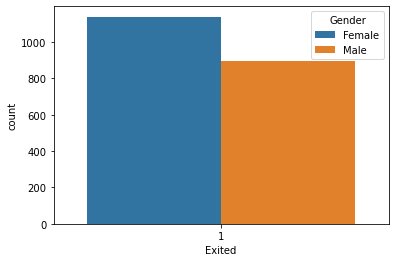

In [8]:
sns.countplot(data = close_account,x='Exited',hue='Gender')

**sedangkan dari countplot ini orang yag paling banyak menutup akunnya berjenis kelamin Wanita**

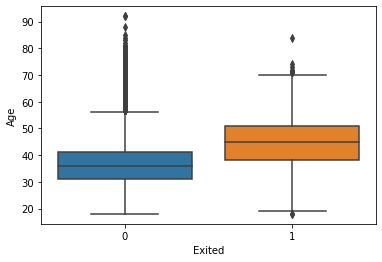

In [9]:
sns.boxplot(x = df['Exited'], y = df['Age'])

**dari boxplot diatas daoat ditarik kesimpulan bahwa orang yang berumur diantara 30 sampai 40 memiliki kecenderungan tidak menutup akun banknya, sedangkan orang yang berumur diantara 40 sampai 50 memiliki kecenderungan menutup akun banknya**

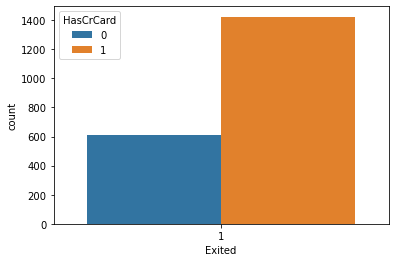

In [10]:
sns.countplot(data = close_account,x='Exited',hue='HasCrCard')

**dari countplot ini dapat disimpulkan bahwa orang yang memiliki kartu kredit paling banyak menutup akun banknya**

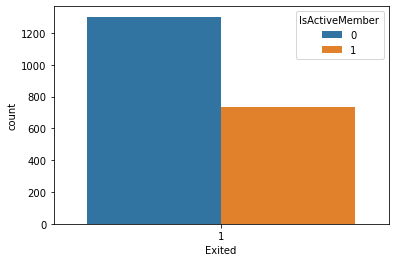

In [11]:
sns.countplot(data = close_account,x='Exited',hue='IsActiveMember')

**dari countplot ini dapat disimpulkan bahwa orang yang merupakan member yang tidak aktif paling banyak menutup akun banknya**

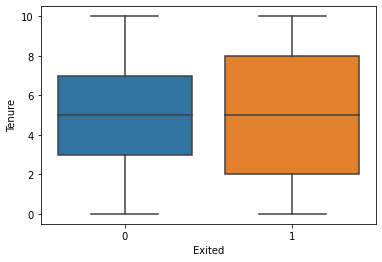

In [12]:
sns.boxplot(x = df['Exited'], y = df['Tenure'])

**dari boxplot diatas dapat disimpulkan bahwa orang yang sudah menjadi nasabah selama sampai 7 tahun masih cenderung belum menutup akun banknya sedangkan nasabah yang baru maenjadi nasabah dibawah 3 tahun dan sudah menjadi nasabah diatas 7 tahun memiliki kecenderungan menutup akun banknya**

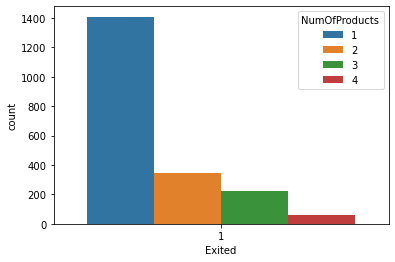

In [13]:
sns.countplot(data = close_account,x='Exited',hue='NumOfProducts')

**dari countplot diatas dapat disimpulkan bahwa orang yang paling banyak menutup akun banknya adalah orang yang paling sedikit menggunakan produk dari bank**

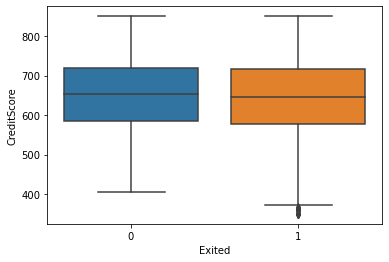

In [14]:
sns.boxplot(x = df['Exited'], y = df['CreditScore'])

**dari boxplot diatas dapat diambil kesimpulan bahwa orang yang yang memiliki angka _Credit Score_ dibawah 400 akan menutup akun banknya**

## Data Cleaning & Preprocessing

In [15]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [16]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**saya melakukan drop pada 3 kolom, yaitu kolom _RowNumber_ , _CustomerId_ , dan _Surname_ karena pada kolom tersebut tidak dapat diambil informasinya yang berkaitan dengan dengan kolom yang akan menjadi target yaitu kolom _Exited_**

In [17]:
df = pd.get_dummies(df,columns=['Geography','Gender'])
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


**kolom _Geography_ dan _Gender_ memiliki data kategorikal jadi saya mengubahnya menjadi data numerik dengan menggunakan _dummy_**

In [18]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.008928,0.005538,0.004780,0.002857,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.039208,0.046897,-0.001685,0.027544,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.002848,-0.000567,0.003868,-0.014733,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.231329,0.401110,-0.134892,-0.012087,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.001230,-0.010419,0.009039,0.021859,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.002467,0.010577,-0.013480,-0.005766,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.003317,-0.020486,0.016732,-0.022544,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.003332,0.010297,-0.006482,0.008112,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.104955,0.173488,-0.052667,0.106512,-0.106512
Geography_France,-0.008928,-0.039208,-0.002848,-0.231329,0.001230,0.002467,0.003317,-0.003332,-0.104955,1.000000,-0.580359,-0.575418,-0.006772,0.006772


### Data Splitting

In [19]:
x = df.drop(['Exited'], axis = 1)
y = df['Exited']

In [20]:
x_train,x_test, y_train, y_test = train_test_split(x,y,stratify=y, random_state=2020)

## Model Benchmark & Evaluation Metric

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
x_train_val,x_test, y_train_val, y_test= train_test_split(x, y, stratify=y, test_size= 0.2, random_state=2020)

In [23]:
logreg= LogisticRegression()
knn= KNeighborsClassifier()
random_forest= RandomForestClassifier(max_depth=3, n_estimators=20, max_features=4)

**Dalam dataset chunurning model ini kesalahan yang akan pihak bank ingin kurangi adalah nasabah yang dprediksi akan tidak menutup akun banknya padahal sebenarnya nasabah menutup akunnya (FN), maka metric evaluasi yang dipakai adalah Recall**

In [24]:
def model_evaluation(model, metric):
    skfold= StratifiedKFold(n_splits=5)
    model_cv= cross_val_score(model, x_train_val, y_train_val,cv= skfold, scoring=metric)
    return model_cv

In [25]:
def print_result(model_cv):
    print('CV score', model_cv)
    print('CV score mean', model_cv.mean())
    print('CV score std', model_cv.std())

In [26]:
model_cv= model_evaluation(logreg, 'recall')
print_result(model_cv)

CV score [0.07055215 0.05214724 0.05214724 0.03374233 0.07361963]
CV score mean 0.056441717791411036
CV score std 0.014466044322149199


In [27]:
model_cv= model_evaluation(knn, 'recall')
print_result(model_cv)

CV score [0.05214724 0.08588957 0.07055215 0.09202454 0.0797546 ]
CV score mean 0.07607361963190185
CV score std 0.01390893748313452


In [28]:
model_cv= model_evaluation(random_forest, 'recall')
print_result(model_cv)

CV score [0.16564417 0.13190184 0.2392638  0.12883436 0.13496933]
CV score mean 0.1601226993865031
CV score std 0.04171779141104295


**dari ketiga model di atas yang saya pilih yaitu model _Logistic Regression_ karena memiliki nilai score yang naik turunnya agak stabil, nilai mean nya paling tinngi dan nilai standar deviasinya cukup rendah** 

### Model Preformance in Test set

In [29]:
logreg= LogisticRegression()
logreg.fit(x_train_val, y_train_val)

LogisticRegression()

In [31]:
y_pred= logreg.predict(x_test)

In [32]:
print('recall', recall_score(y_test, y_pred))

recall 0.07125307125307126


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1593
           1       0.41      0.07      0.12       407

    accuracy                           0.79      2000
   macro avg       0.61      0.52      0.50      2000
weighted avg       0.72      0.79      0.73      2000



## Hyperparameter Tunning

In [35]:
model= LogisticRegression(solver='liblinear')
estimator= Pipeline([
    ('model',logreg)
])

In [36]:
hyperparam_space={
    'model__solver':['liblinear', 'newton-cg'],
    'model__C':[100,10,1,0.1,0.01,0.001]
}

In [37]:
skfold=StratifiedKFold(n_splits=5)
grid_search=GridSearchCV(
    estimator,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring='recall'
    ,n_jobs=-1
    )

In [38]:
grid_search.fit(x_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'model__solver': ['liblinear', 'newton-cg']},
             scoring='recall')

In [39]:
print('best score', grid_search.best_score_)
print('best param', grid_search.best_params_)

best score 0.201840490797546
best param {'model__C': 1, 'model__solver': 'newton-cg'}


### Before Tunning

In [41]:
y_pred=estimator.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1593
           1       0.41      0.07      0.12       407

    accuracy                           0.79      2000
   macro avg       0.61      0.52      0.50      2000
weighted avg       0.72      0.79      0.73      2000



In [42]:
recall_score(y_test,y_pred)

0.07125307125307126

### After Tunning

In [43]:
grid_search.best_estimator_.fit(x_train_val,y_train_val)

Pipeline(steps=[('model', LogisticRegression(C=1, solver='newton-cg'))])

In [44]:
y_pred=grid_search.best_estimator_.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1593
           1       0.65      0.20      0.31       407

    accuracy                           0.82      2000
   macro avg       0.74      0.59      0.60      2000
weighted avg       0.79      0.82      0.77      2000



In [45]:
recall_score(y_test,y_pred)

0.20147420147420148

**setelah melakukan hyperparameter tunning ada kenaikan score yang cukup tinggi, jadi dapat disimpulkan bahwa model yang dipakai dapat lebih optimal apabila dilakukan hyperparameter tunning pada model logistic regresi**